## Lead Score Data Analysis (Logistics Regression)
Total Variable in the data is 37

<H2>Step1: Importing Libraries</H2>

In [1]:
#supress warnings
import warnings;
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#SKlearn library
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [4]:
#stats model library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
#Adding minimum 50 columns for visibility
pd.set_option('display.max_columns', 50)

<H2>Step2: Read & Analyse Data</H2>

In [6]:
#Read Data 
data = pd.read_csv('Leads.csv')

In [7]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
data.shape

(9240, 37)

In [9]:
#No Null Objects present 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<H2>Step3: Data Cleaning</H2>

<H4>#As per the provided description categorical variables have a level called 'Select' which needs to be converted as 'NAN'.<Br> 
# Reason for this may be they have not selected any value for the drop down</H4>

In [10]:
data.replace('Select', np.NAN, inplace=True)

<H4>#Checking for Null Values in the Data</H4>

In [11]:
round(data.isnull().sum()/len(data) * 100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

<H4>#Variables like "How did you hear about X Education", "Lead Profile" has more than 60% null values which can be dropped</H4>

In [12]:
data.drop(['How did you hear about X Education','Lead Profile'], axis=1, inplace=True)

<H4>#Asymmetrique columns can be dropped<br> 
#These columns contains over 45% null values<br> 
#And may not have a imputation stratergy<br> 
#Dropping these columns may reduce the complexity of the model </H4>

In [13]:
data.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1, inplace=True)

In [14]:
round(data.isnull().sum()/len(data) * 100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

<H4>#Prospect ID and Lead Number are identifiers that don't have any predictive power</H4> 

In [15]:
data.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

In [16]:
round(data.isnull().sum()/len(data) * 100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
biased_columns = ['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Magazine']

for column in biased_columns:
    print(data[column].value_counts(normalize=True))
    print("----------------------------------------")

Receive More Updates About Our Courses
No    1.0
Name: proportion, dtype: float64
----------------------------------------
Update me on Supply Chain Content
No    1.0
Name: proportion, dtype: float64
----------------------------------------
Get updates on DM Content
No    1.0
Name: proportion, dtype: float64
----------------------------------------
I agree to pay the amount through cheque
No    1.0
Name: proportion, dtype: float64
----------------------------------------
Magazine
No    1.0
Name: proportion, dtype: float64
----------------------------------------


<H4>#'Receive More Updates About Our Courses' data contains only one type as 'No' which does not make sense to be retained<Br>
#'Update me on Supply Chain Content' data contains only one type as 'No' which does not make sense to be retained<Br>
#'Get updates on DM Content' data contains only one type as 'No' which does not make sense to be retained<Br>
#'I agree to pay the amount through cheque' data contains only one type as 'No' which does not make sense to be retained<Br>
#'Magazine' data contains only one type as 'No' which does not make sense to be retained<Br>
#'Do Not Call' data contains only one type as 'No' which does not make sense to be retained<Br>
# Dropping Country due to high number of missing values</H4>  

In [18]:
data.drop(['Do Not Call','Country','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Magazine'], axis=1, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Specialization                                 5860 non-null   object 
 9   What is your current occupation                6550 

In [20]:
skewed_columns = ['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Last Activity', 'Last Notable Activity']

for column in skewed_columns:
    print(data[column].value_counts(normalize=True))
    print("----------------------------------------")

Search
No     0.998485
Yes    0.001515
Name: proportion, dtype: float64
----------------------------------------
Newspaper Article
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64
----------------------------------------
X Education Forums
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64
----------------------------------------
Newspaper
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64
----------------------------------------
Digital Advertisement
No     0.999567
Yes    0.000433
Name: proportion, dtype: float64
----------------------------------------
Last Activity
Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribe

<H4>#'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement' seems to be high skewed<Br>
    #Need to drop these columns as it does not have provide any insights</H4>

In [21]:
data.drop(columns=skewed_columns, axis=1, inplace=True)

In [22]:
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Through Recommendations                             0
Tags                                             3353
Lead Quality                                     4767
City                                             3669
A free copy of Mastering The Interview              0
dtype: int64

<H4>#Imputing Missing Data for the variables<Br>
#Lead source google value is same as Google, hence changing the value<Br>
#Imputing the missing values with mode value</H4>


In [23]:
#Lead source google value is same as Google, hence changing the value
#Imputing Lead source with mode value in the column
data['Lead Source'].replace('google', 'Google', inplace=True)
data['Lead Source'].replace(np.nan,data['Lead Source'].mode()[0], inplace=True)
data['Lead Source'].value_counts(normalize=True)

Lead Source
Google               0.314827
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
Click2call           0.000433
Social Media         0.000216
Live Chat            0.000216
Press_Release        0.000216
Pay per Click Ads    0.000108
blog                 0.000108
WeLearn              0.000108
welearnblog_Home     0.000108
youtubechannel       0.000108
testone              0.000108
NC_EDM               0.000108
Name: proportion, dtype: float64

In [24]:
data.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Through Recommendations                             0
Tags                                             3353
Lead Quality                                     4767
City                                             3669
A free copy of Mastering The Interview              0
dtype: int64

<H4>#TotalVisits, Page Views Per Visit  is a continuous variable and due to outliers, median imputation would be the best approach<H4>

In [25]:
data['TotalVisits'].replace(np.NAN, data['TotalVisits'].median(),inplace=True)
data['Page Views Per Visit'].replace(np.NAN, data['Page Views Per Visit'].median(),inplace=True)

<H4>#'Lead Quality','City','Specialization','What is your current occupation' is a categorical variable, lets impute with 'Unknown' value so that we can differentiate between known engagement and unknown engagement</H4>

In [26]:
data['Lead Quality'].replace(np.NAN, 'Unknown',inplace=True)
data['City'].replace(np.NAN, 'Unknown',inplace=True)
data['Specialization'].replace(np.NAN, 'Unknown',inplace=True)
data['What is your current occupation'].replace(np.NAN, 'Unknown',inplace=True)

<H4>#'What matters most to you in choosing a course','Tags' is a categorical variable,<Br>
#the values seems to be dominated by single response, and there seems to be less variations<Br>
#Will drop the column</H4>

In [27]:
data.drop(columns=['What matters most to you in choosing a course','Tags'],inplace=True)

In [28]:
data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
Through Recommendations                   0
Lead Quality                              0
City                                      0
A free copy of Mastering The Interview    0
dtype: int64

### Univariate Analysis

<H4>#Visualization for Categorical Variable</H4>

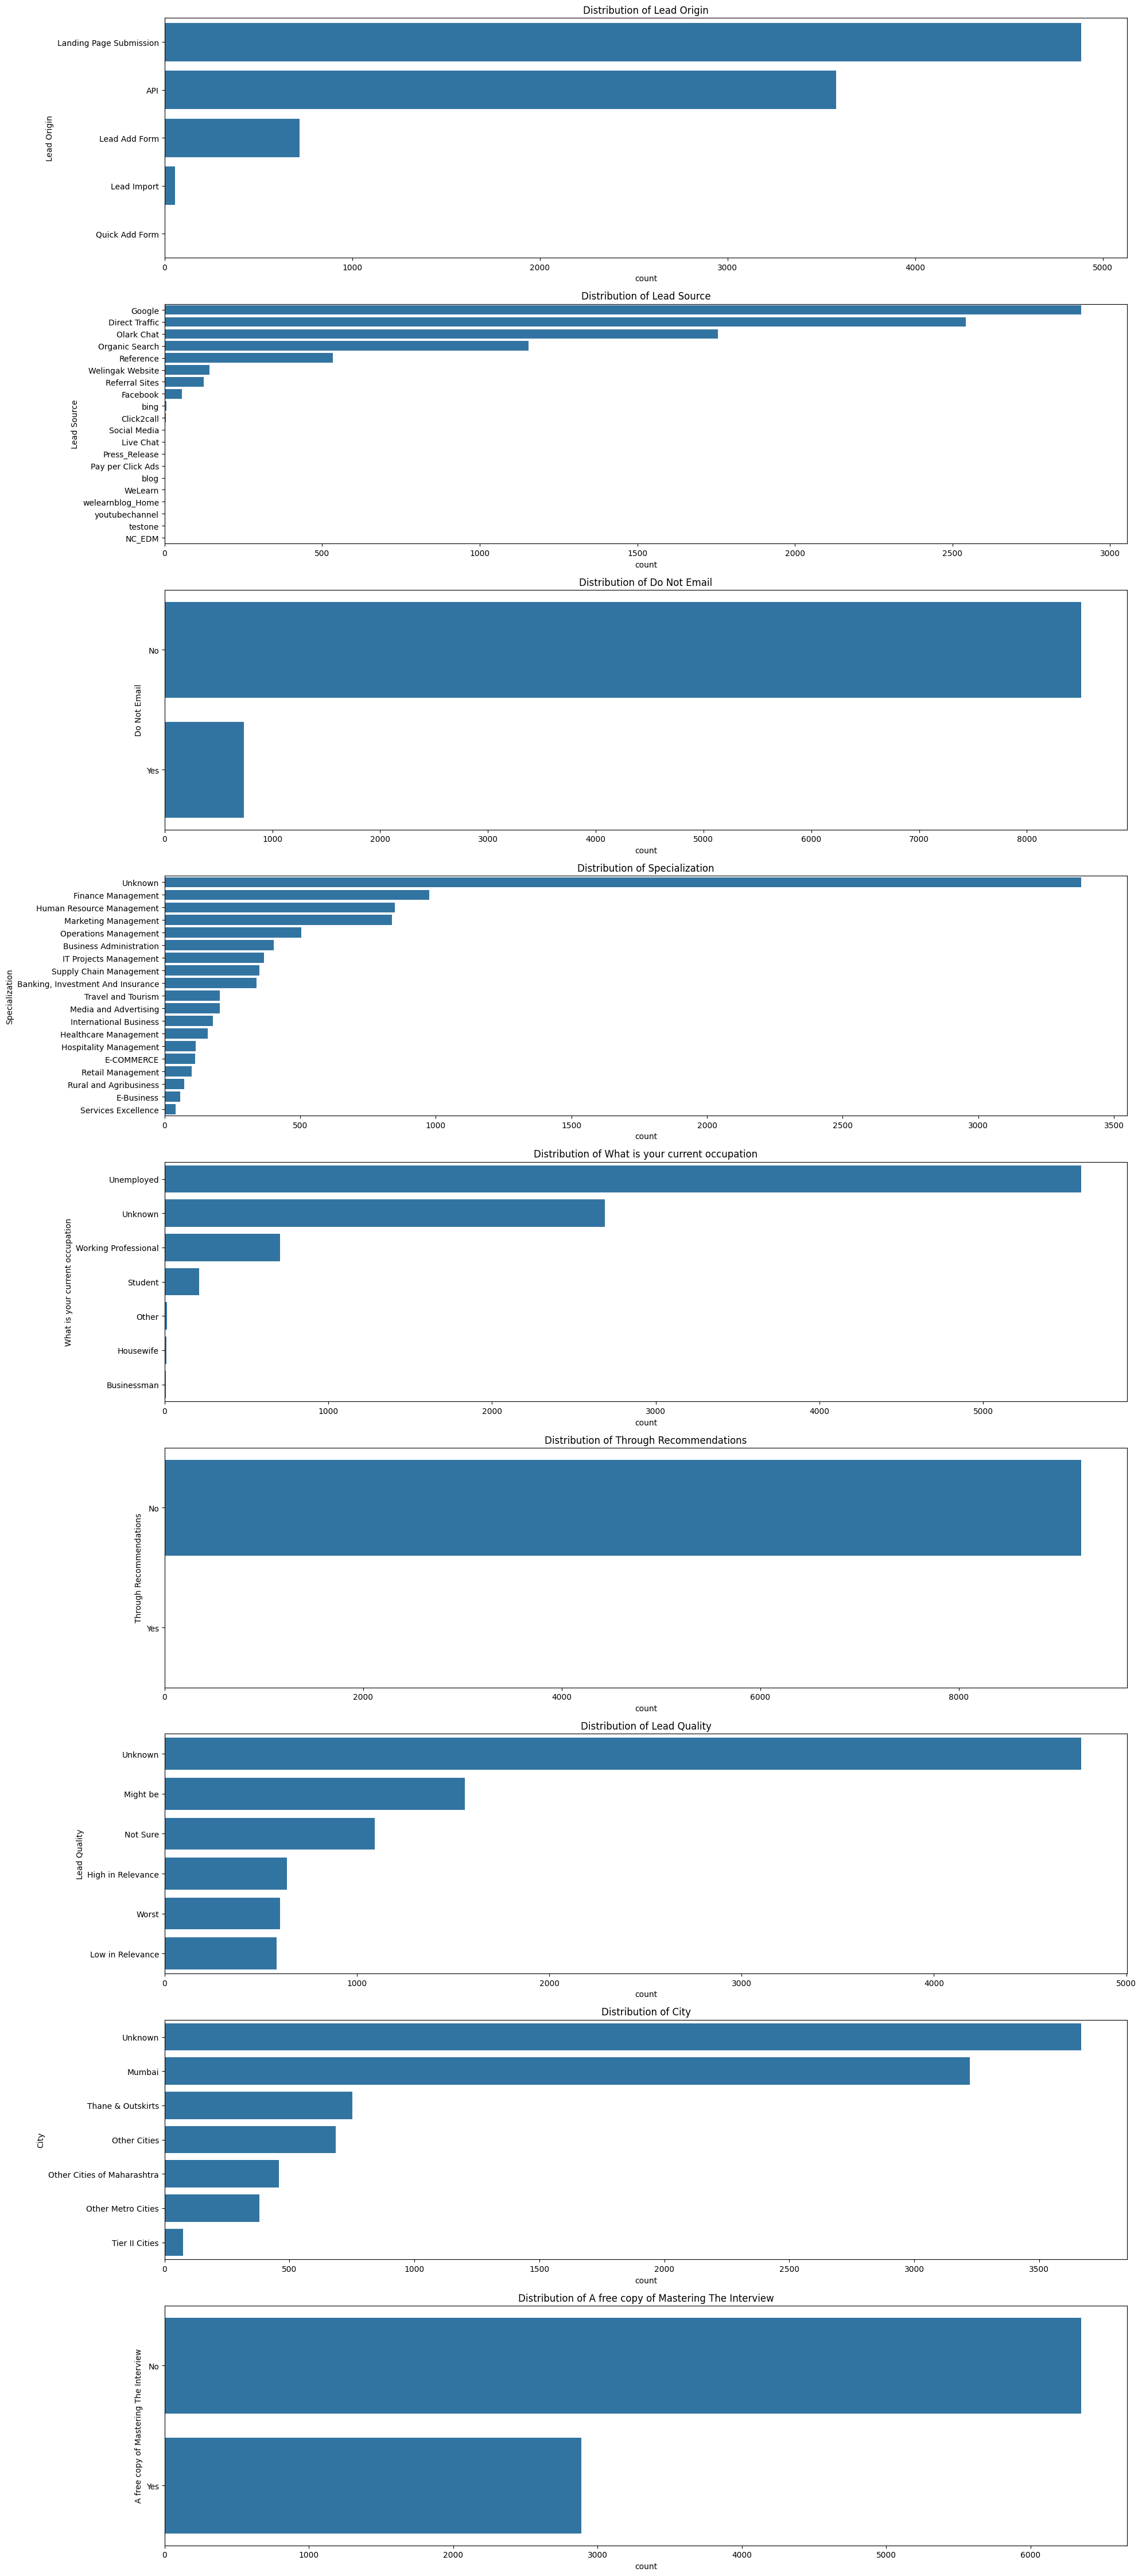

In [29]:
def visualize_Cat_columns(data):
    cat_columns = data.select_dtypes(include=['object']).columns
    plt.figure(figsize=(20, len(cat_columns) * 5))
    for i, column in enumerate(cat_columns, 1):
        plt.subplot(len(cat_columns), 1, i)
        sns.countplot(y=data[column], order=data[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.tight_layout()
visualize_Cat_columns(data)        

### Step4: Data Transformation - Encoding Categorical Variables

In [30]:
data.head()


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Through Recommendations,Lead Quality,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Unknown,Unemployed,No,Low in Relevance,Unknown,No
1,API,Organic Search,No,0,5.0,674,2.5,Unknown,Unemployed,No,Unknown,Unknown,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,No,Might be,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No,Not Sure,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unknown,Unemployed,No,Might be,Mumbai,No


<H4>#Function for Selecting category columns having Yes or No values</H4>

In [31]:
def list_yes_no_col(df):
    yes_no_col = [];

    for col in df.columns:
        unique_values = df[col].unique()

        if set(unique_values) == {'Yes', 'No'}:
            yes_no_col.append(col)
    return yes_no_col

yes_no_columns = list_yes_no_col(data)
print("columns with Yes_No values", yes_no_columns)


columns with Yes_No values ['Do Not Email', 'Through Recommendations', 'A free copy of Mastering The Interview']


<H4>#Transform the columns to 'Yes' = 1 and 'No'= 0</H4>

In [32]:
data[yes_no_columns] = data[yes_no_columns].replace({'Yes':1,'No':0})

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Through Recommendations                 9240 non-null   int64  
 10  Lead Quality                            9240 non-null   obje

<H4>#Check for the Outliers and capping them</H4>

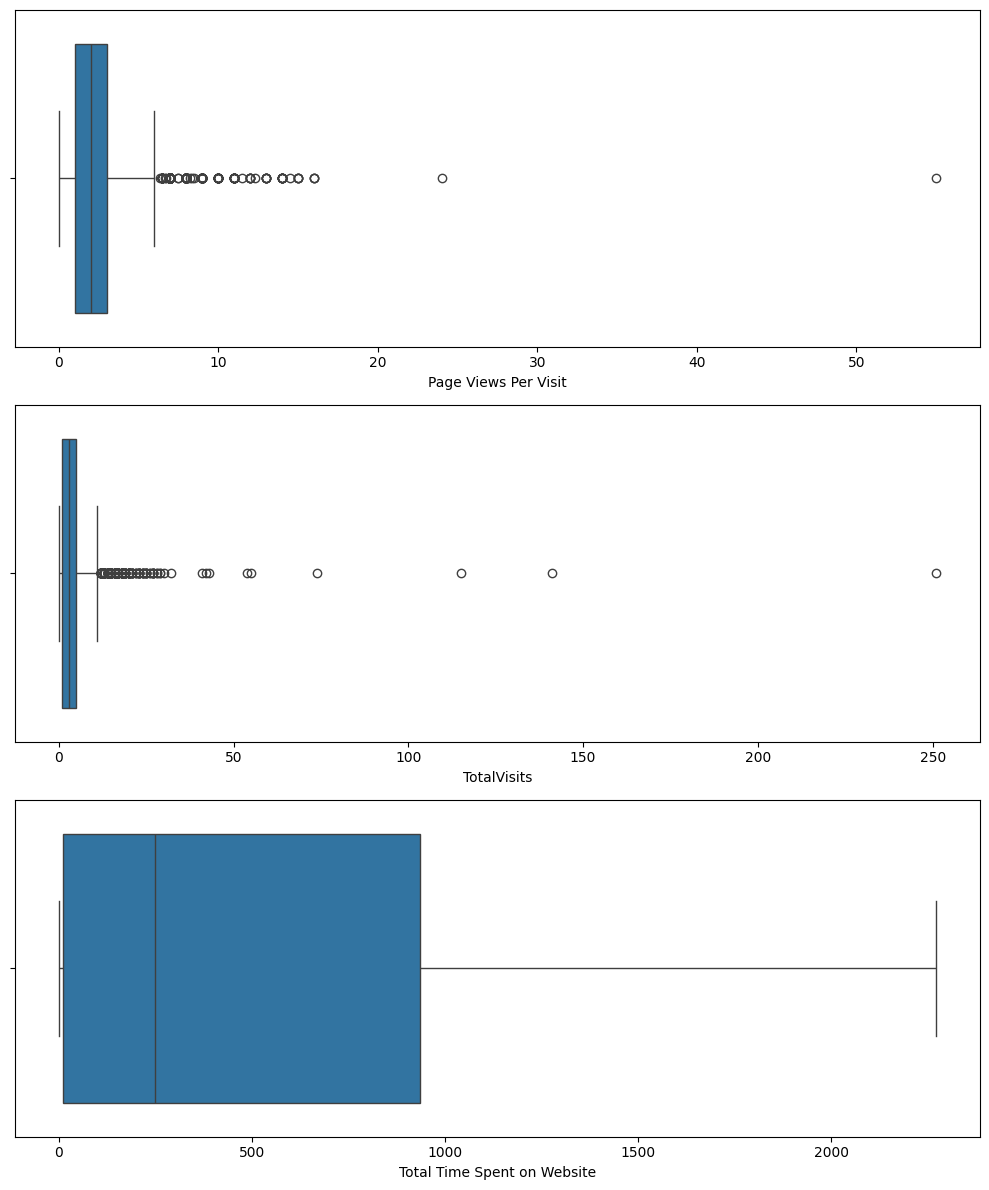

In [34]:
#Function to check for outliers in the below numeric columns

outlier_columns = ['Page Views Per Visit', 'TotalVisits', 'Total Time Spent on Website']

def outlier_box_plot(df, columns):
    plt.figure(figsize=(10,len(columns)*4))
 
    for i, column in enumerate(columns, 1):
        plt.subplot(len(columns),1,i)
        sns.boxplot(df, x=df[column])
    plt.tight_layout()    

outlier_box_plot(data, outlier_columns)

<H4>#From the above box plot, Total Visits and Page views per visit needs to be fixed for outliers<Br>
#Capping the outliers to 95th percentile</H4>

In [35]:
#Function to cap the outliers to 95th percentile
cap_outlier_col = ['Page Views Per Visit', 'TotalVisits']

def cap_outliers(df, columns, lower_cutoff, upper_cutoff):
    for column in columns:
        lower_bound = data[column].quantile(lower_cutoff)
        upper_bound = data[column].quantile(upper_cutoff)

        df[column] = np.where(df[column] < lower_bound,lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

cap_outliers(data, cap_outlier_col, 0.5, 0.95)

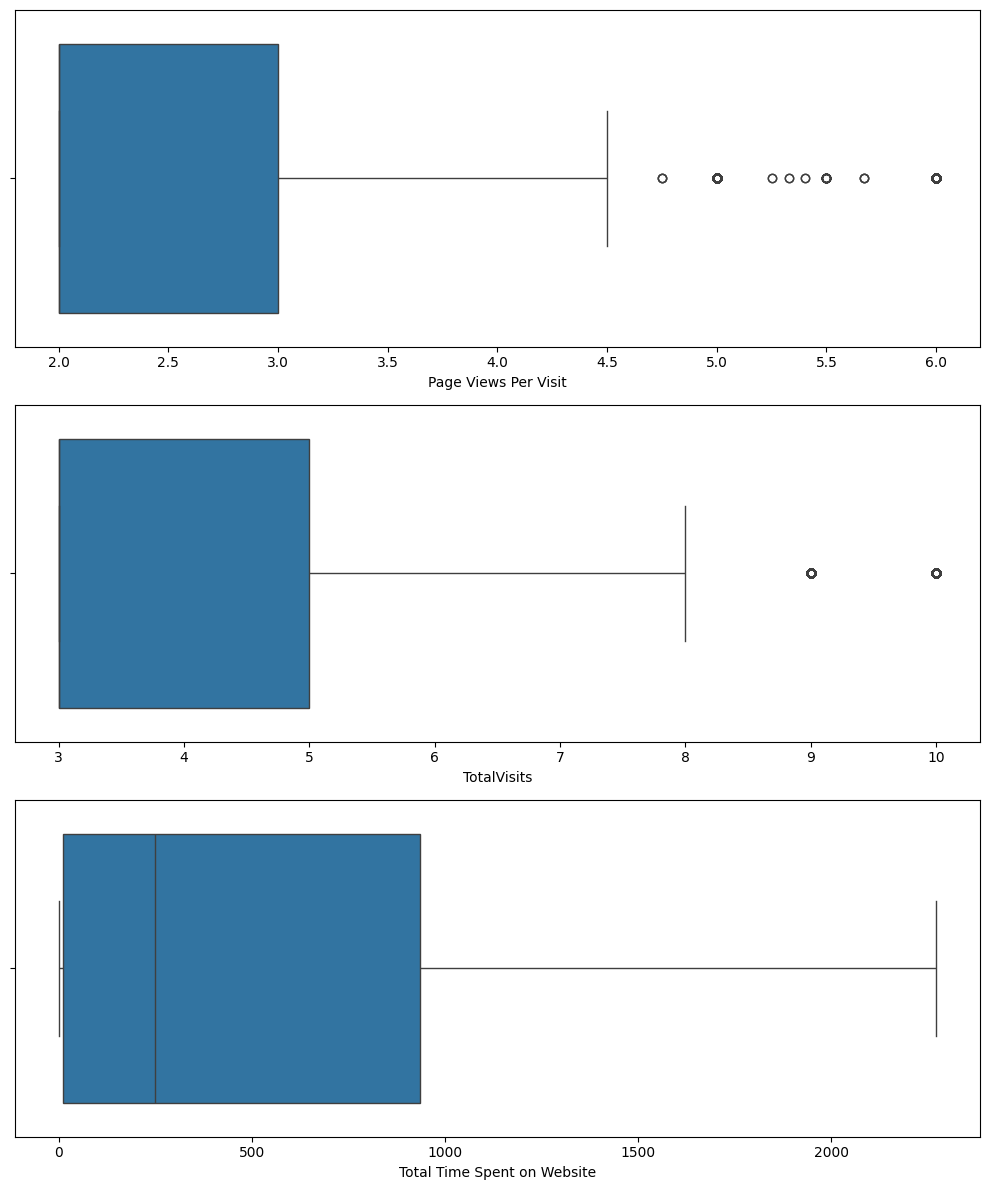

In [36]:
outlier_box_plot(data, outlier_columns)

<H4>#Creating Dummy Variables for the below mentioned columns<Br> 
#Will drop the first column after creating the dummy variables to avoid Multicollinearity</H4>

In [37]:
#Function to create Dummy Variables

dummy_columns = ['Lead Origin', 'Lead Source','Specialization','What is your current occupation','Lead Quality','City']

def create_dummies_var(df, columns, drop_first_flag):
    data_with_dummies = pd.get_dummies(data=df,columns=columns,drop_first=drop_first_flag)
    data_with_dummies.replace({False:0, True:1}, inplace=True)
    return data_with_dummies
    
leads_with_dummies = create_dummies_var(data, dummy_columns, True)

### Step5: Feature Selection & Data Prepapration 

In [38]:
#Splitting the Target and Feature variables and assigning to y, X variables

y = leads_with_dummies['Converted']
X = leads_with_dummies.drop(columns='Converted', axis=1)

In [39]:
#Splitting the dataset into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [40]:
#Function for fit and transform the data set

std_scaler_col = ['Total Time Spent on Website', 'TotalVisits', 'Page Views Per Visit']
scaler = StandardScaler()
def scaler_transform(data, columns, train_flag='Yes'):
    #Feature Standardization using standard scaler
    if train_flag == "Yes":
        data[columns] = scaler.fit_transform(data[columns])
    else:
        data[columns] = scaler.transform(data[columns])   
    return data

In [41]:
#Passing the X_train data into the function parameters - (Data set, columns to standardize, train_flag)
X_train  = scaler_transform(X_train, std_scaler_col,"Yes")

In [42]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,-5.602610e-17,4.504059e-17,-4.613914e-17,0.001082,0.315708,0.529839,0.073129,0.005875,0.000155,0.277829,0.005875,0.317100,0.000309,0.000155,0.193414,0.121985,0.000155,0.0,0.056432,0.013142,0.000309,0.000155,0.012059,0.000618,...,0.022418,0.055349,0.010977,0.007730,0.004484,0.038188,0.022727,0.361626,0.001082,0.001391,0.021490,0.609462,0.290198,0.075448,0.063698,0.168367,0.119357,0.515152,0.064162,0.072820,0.049629,0.040662,0.081787,0.007885,0.391775
std,0.268799,1.000077e+00,1.000077e+00,1.000077e+00,0.032882,0.464833,0.499147,0.260369,0.076429,0.012434,0.447963,0.076429,0.465383,0.017583,0.012434,0.395005,0.327294,0.012434,0.0,0.230771,0.113890,0.017583,0.012434,0.109159,0.024862,...,0.148050,0.228679,0.104203,0.087589,0.066815,0.191665,0.149044,0.480509,0.032882,0.037279,0.145024,0.487909,0.453889,0.264134,0.244233,0.374221,0.324233,0.499809,0.245060,0.259861,0.217194,0.197521,0.274062,0.088453,0.488185
min,0.000000,-5.952895e-01,-8.875245e-01,-6.772059e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-5.952895e-01,-8.638318e-01,-6.772059e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-5.952895e-01,-4.373616e-01,-6.772059e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

### Step6: Model Building

In [43]:
#Function created for Feature Selection using RFE

def feature_selection_rfe(X_data,y_data, num_feature,train_flag='Yes'):

    #Instatntiate with logistic regression

    model = LogisticRegression(max_iter=100)
    rfe = RFE(model, n_features_to_select=num_feature)

    #Fit RFE in the data based on training and test data
    if train_flag == "Yes":
        X_data_RFE = rfe.fit(X_data,y_data)
    else:
        X_data_RFE = rfe.transform(X_data,y_data)

    selected_features = X_data.columns[rfe.support_]
    feature_ranking = list(zip(X_data.columns,rfe.support_ ,rfe.ranking_))

    return X_data_RFE, selected_features,feature_ranking

In [44]:
X_data_rfe,selected_features,feature_ranking =  feature_selection_rfe(X_train, y_train,20,'Yes' )

In [45]:
feature_ranking

[('Do Not Email', True, 1),
 ('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Through Recommendations', False, 36),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', False, 26),
 ('Lead Source_Direct Traffic', False, 12),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 9),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 37),
 ('Lead Source_WeLearn', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False

In [46]:
#Creating the data frame with selected features 
X_train_rfe = X_train[selected_features]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_E-COMMERCE,Specialization_Hospitality Management,What is your current occupation_Housewife,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst
4715,0,-0.887525,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
7132,0,1.386983,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8954,0,-0.182209,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5283,1,1.315905,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3003,0,1.580170,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [47]:
#Function to calculate VIF
#To avoid redundancy

def VIF_get_code(col):
    vif = pd.DataFrame()
    X = X_train[col]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [48]:
#Function to evaluate model
#To avoid redundancy
def model_eval(X_data, y_data):
    X_data_1=sm.add_constant(X_data)
    logist_model = sm.GLM(y_data,X_data_1, sm.families.Binomial()).fit()
    return logist_model


In [49]:
#Function to create Model Prediction
#To avoid redundancy

def model_predict(y_data, y_data_pred):
    #Accuracy
    print(f'Accuracy : {metrics.accuracy_score(y_data, y_data_pred)}')
    print("--------------------")
    #precision
    print(f'Precision : {metrics.precision_score(y_data, y_data_pred)}')
    print("--------------------")
    #Recall
    print(f'Recall : {metrics.recall_score(y_data, y_data_pred)}')
    print("--------------------")
    #F1 Score
    print(f'F1-Score : {metrics.f1_score(y_data, y_data_pred)}')
    print("--------------------")
    #Confusion Matrix
    print(f'Confusion Matrix - \n : {metrics.confusion_matrix(y_data, y_data_pred)}')


In [50]:
#Function to create ROC Curve & Residual Analysis
#To avoid redundancy

def roc_curve_model(y_data, y_data_pred):
    print("-------------------------------ROC Curve-------------------------------")
    #ROC Curve
    plt.figure(figsize=(8,6))
    False_pos_rate, true_pos_rate, threshhold = metrics.roc_curve(y_data, y_data_pred)
    auc_score = metrics.roc_auc_score(y_data, y_data_pred)
    plt.plot( False_pos_rate, true_pos_rate, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    print("-------------------------------Residual Analysis-------------------------------")
    # Calculate residuals
    residuals = y_train - y_data_pred
    # Plot residuals distribution
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Distribution')
    plt.show()

    # Q-Q Plot to check normality
    sm.qqplot(residuals, line='45')
    plt.title('Q-Q Plot of Residuals')
    plt.show()

### Model - 1

In [51]:
model = model_eval(X_train_rfe, y_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2431.4
Date:                Tue, 17 Sep 2024   Deviance:                       4862.8
Time:                        18:35:25   Pearson chi2:                 6.58e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4402
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3706      0.228     10.382      0.000       1.923       2.818
Do Not Email                                            -0.9586      0.171     -5.602      0.000      -1.294      -0.623
Total Time Spent on Website                              1.0352      0.042     24.633      0.000       0.953       1.118
Lead Origin_Landing Page Submission                     -0.2960      0.095     -3.117      0.002      -0.482      -0.110
Lead Origin_Lead Add Form                                2.6376      0.543      4.860      0.000       1.574       3.701
Lead Source_Facebook                                    -0.9860      0.504     -1.955      0.051      -1.974       0.002
Lead Source_NC_EDM                                      25.8842   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Olark Chat                                   0.8446      0.123      6.858      0.000       0.603       1.086
Lead Source_Reference                                   -0.5314      0.579     -0.918      0.359      -1.667       0.604
Lead Source_Referral Sites                              -0.7123      0.347     -2.052      0.040      -1.393      -0.032
Lead Source_Welingak Website                            23.6406   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Specialization_E-COMMERCE                                0.5463      0.334      1.634      0.102      -0.109       1.202
Specialization_Hospitality Management                   -1.0061      0.361     -2.790      0.005      -1.713      -0.299
What is your current occupation_Housewife               22.7869   4.74e+04      0.000      1.000   -9.28e+04    9.28e+04
What is your current occupation_Unknown                 -0.7022      0.099     -7.091      0.000      -0.896      -0.508
What is your current occupation_Working Professional     1.5748      0.196      8.043      0.000       1.191       1.959
Lead Quality_Low in Relevance                           -1.3686      0.257     -5.332      0.000      -1.872      -0.865
Lead Quality_Might be                                   -1.6784      0.229     -7.317      0.000      -2.128      -1.229
Lead Quality_Not Sure                                   -3.5989      0.236    -15.280      0.000      -4.060      -3.137
Lead Quality_Unknown                                    -3.5283      0.226    -15.603      0.000      -3.971      -3.085
Lead Quality_Worst                                      -6.2085      0.408    -15.215      0.000      -7.008      -5.409
========================================================================================================================
"""

In [52]:
selected_features = X_train_rfe.columns
VIF_get_code(selected_features)

                                             Features    VIF
3                           Lead Origin_Lead Add Form  16.18
7                               Lead Source_Reference  13.37
18                               Lead Quality_Unknown   3.87
9                        Lead Source_Welingak Website   3.64
2                 Lead Origin_Landing Page Submission   3.08
13            What is your current occupation_Unknown   2.38
6                              Lead Source_Olark Chat   1.98
16                              Lead Quality_Might be   1.81
17                              Lead Quality_Not Sure   1.45
14  What is your current occupation_Working Profes...   1.36
1                         Total Time Spent on Website   1.28
15                      Lead Quality_Low in Relevance   1.27
19                                 Lead Quality_Worst   1.25
0                                        Do Not Email   1.13
8                          Lead Source_Referral Sites   1.04
4                       

In [53]:
X_train_sm = sm.add_constant(X_train_rfe)
y_train_pred_prob = model.predict(X_train_sm)
y_train_pred = np.where(y_train_pred_prob >= 0.5, 1, 0)

In [54]:
y_train_pred

array([0, 1, 0, ..., 1, 0, 1])

In [55]:
model_predict(y_train, y_train_pred)

Accuracy : 0.8302411873840445
--------------------
Precision : 0.8127256317689531
--------------------
Recall : 0.7250402576489533
--------------------
F1-Score : 0.7663829787234042
--------------------
Confusion Matrix - 
 : [[3569  415]
 [ 683 1801]]


-------------------------------ROC Curve-------------------------------


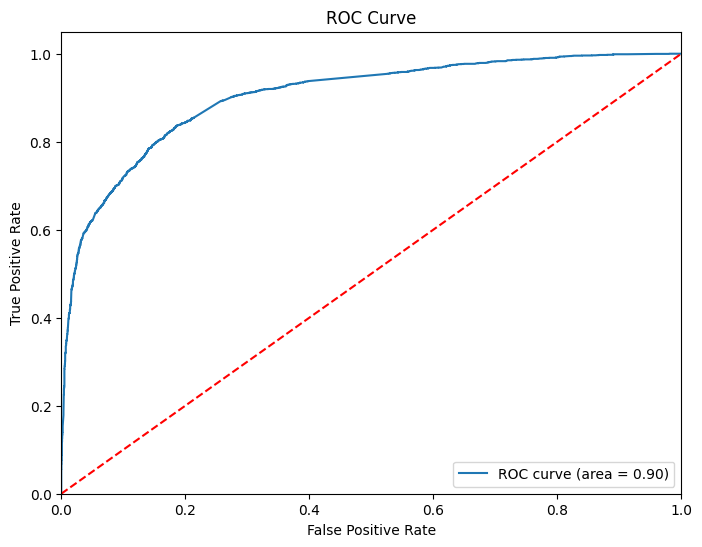

-------------------------------Residual Analysis-------------------------------


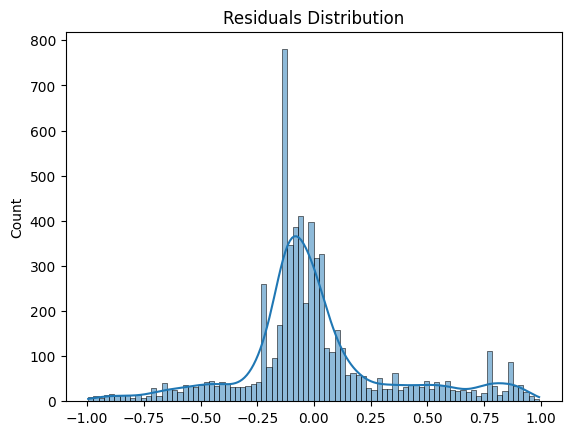

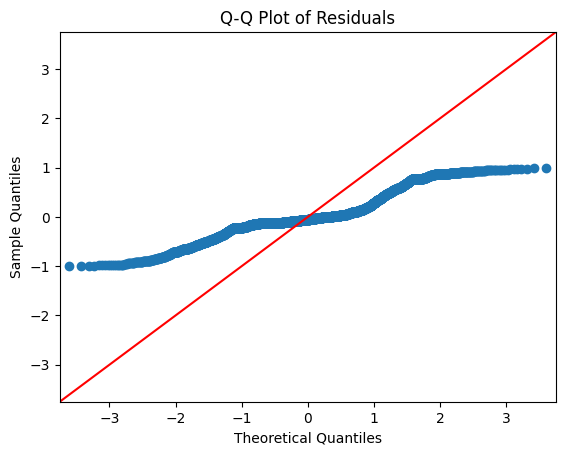

In [56]:
roc_curve_model(y_train, y_train_pred_prob)

### Model - 2

In [57]:
#Dropping features with high p-value and VIF
X_train_rfe.drop(['Lead Source_Reference', 'Lead Source_NC_EDM'],axis=1,inplace=True)

In [58]:
model = model_eval(X_train_rfe, y_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2433.4
Date:                Tue, 17 Sep 2024   Deviance:                       4866.8
Time:                        18:35:26   Pearson chi2:                 6.60e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4399
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3613      0.228     10.351      0.000       1.914       2.808
Do Not Email                                            -0.9415      0.169     -5.566      0.000      -1.273      -0.610
Total Time Spent on Website                              1.0357      0.042     24.659      0.000       0.953       1.118
Lead Origin_Landing Page Submission                     -0.2928      0.095     -3.085      0.002      -0.479      -0.107
Lead Origin_Lead Add Form                                2.1932      0.228      9.605      0.000       1.746       2.641
Lead Source_Facebook                                    -0.9811      0.504     -1.947      0.052      -1.969       0.006
Lead Source_Olark Chat                                   0.8456      0.123      6.872      0.000       0.604       1.087
Lead Source_Referral Sites                              -0.7109      0.347     -2.049      0.040      -1.391      -0.031
Lead Source_Welingak Website                            24.0832   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Specialization_E-COMMERCE                                0.5434      0.334      1.626      0.104      -0.112       1.198
Specialization_Hospitality Management                   -1.0126      0.361     -2.805      0.005      -1.720      -0.305
What is your current occupation_Housewife               22.7745   4.73e+04      0.000      1.000   -9.27e+04    9.27e+04
What is your current occupation_Unknown                 -0.7008      0.099     -7.088      0.000      -0.895      -0.507
What is your current occupation_Working Professional     1.5686      0.196      8.011      0.000       1.185       1.952
Lead Quality_Low in Relevance                           -1.3665      0.257     -5.321      0.000      -1.870      -0.863
Lead Quality_Might be                                   -1.6731      0.229     -7.295      0.000      -2.123      -1.224
Lead Quality_Not Sure                                   -3.5922      0.235    -15.261      0.000      -4.054      -3.131
Lead Quality_Unknown                                    -3.5189      0.226    -15.577      0.000      -3.962      -3.076
Lead Quality_Worst                                      -6.2031      0.408    -15.204      0.000      -7.003      -5.403
========================================================================================================================
"""

In [59]:
selected_features = X_train_rfe.columns
VIF_get_code(selected_features)

                                             Features   VIF
16                               Lead Quality_Unknown  3.87
2                 Lead Origin_Landing Page Submission  3.07
11            What is your current occupation_Unknown  2.37
5                              Lead Source_Olark Chat  1.98
14                              Lead Quality_Might be  1.81
3                           Lead Origin_Lead Add Form  1.51
15                              Lead Quality_Not Sure  1.45
12  What is your current occupation_Working Profes...  1.36
1                         Total Time Spent on Website  1.28
13                      Lead Quality_Low in Relevance  1.27
7                        Lead Source_Welingak Website  1.26
17                                 Lead Quality_Worst  1.25
0                                        Do Not Email  1.12
6                          Lead Source_Referral Sites  1.04
4                                Lead Source_Facebook  1.03
8                           Specializati

In [60]:
X_train_sm = sm.add_constant(X_train_rfe)
y_train_pred_prob = model.predict(X_train_sm)
y_train_pred = np.where(y_train_pred_prob >= 0.5, 1, 0)

In [61]:
model_predict(y_train, y_train_pred)

Accuracy : 0.8303957946815089
--------------------
Precision : 0.8128101037437979
--------------------
Recall : 0.7254428341384863
--------------------
F1-Score : 0.7666453945968943
--------------------
Confusion Matrix - 
 : [[3569  415]
 [ 682 1802]]


-------------------------------ROC Curve-------------------------------


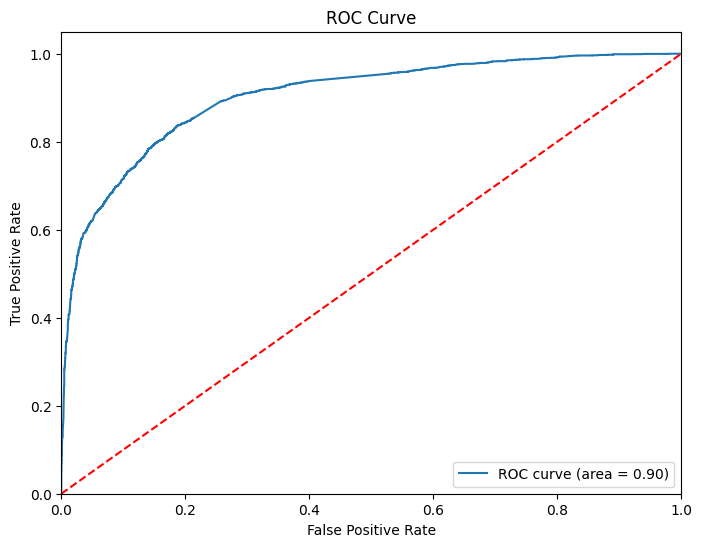

-------------------------------Residual Analysis-------------------------------


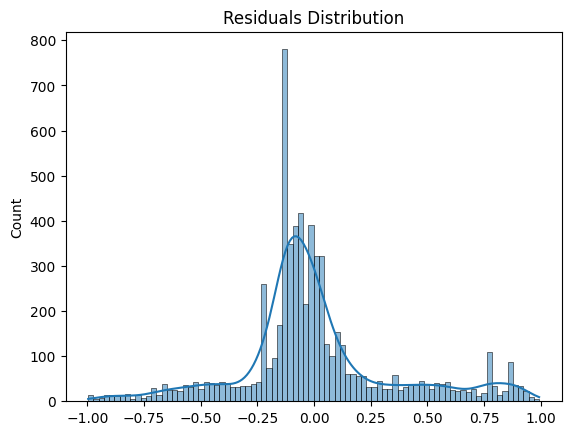

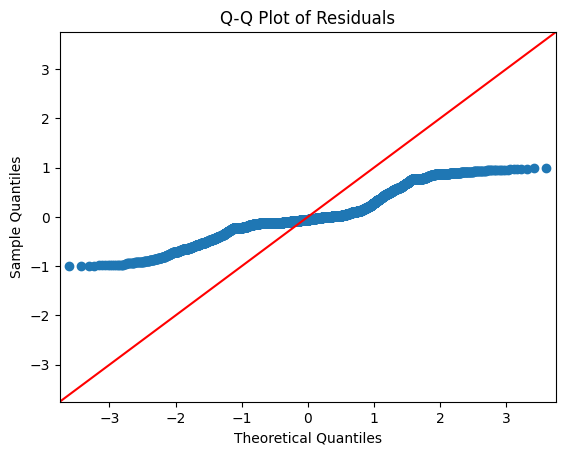

In [62]:
roc_curve_model(y_train, y_train_pred_prob)

### Model - 3

In [63]:
#Removing Insignificant Feature variables with high p-value, 
#Also we will drop the const value as its less significance in our analysis
X_train_rfe.drop(['What is your current occupation_Housewife', 'Lead Source_Welingak Website', 'Specialization_E-COMMERCE'],axis=1,inplace=True)


In [64]:
model = model_eval(X_train_rfe, y_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2463.8
Date:                Tue, 17 Sep 2024   Deviance:                       4927.7
Time:                        18:35:28   Pearson chi2:                 7.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4346
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2839      0.228     10.007      0.000       1.837       2.731
Do Not Email                                            -0.9505      0.167     -5.691      0.000      -1.278      -0.623
Total Time Spent on Website                              1.0288      0.042     24.645      0.000       0.947       1.111
Lead Origin_Landing Page Submission                     -0.2703      0.094     -2.871      0.004      -0.455      -0.086
Lead Origin_Lead Add Form                                3.0832      0.218     14.167      0.000       2.657       3.510
Lead Source_Facebook                                    -0.9427      0.502     -1.879      0.060      -1.926       0.041
Lead Source_Olark Chat                                   0.8315      0.122      6.792      0.000       0.592       1.072
Lead Source_Referral Sites                              -0.7070      0.345     -2.051      0.040      -1.382      -0.031
Specialization_Hospitality Management                   -1.0596      0.366     -2.896      0.004      -1.777      -0.343
What is your current occupation_Unknown                 -0.7424      0.098     -7.544      0.000      -0.935      -0.550
What is your current occupation_Working Professional     1.5255      0.197      7.736      0.000       1.139       1.912
Lead Quality_Low in Relevance                           -1.3202      0.258     -5.112      0.000      -1.826      -0.814
Lead Quality_Might be                                   -1.6271      0.230     -7.060      0.000      -2.079      -1.175
Lead Quality_Not Sure                                   -3.5252      0.236    -14.956      0.000      -3.987      -3.063
Lead Quality_Unknown                                    -3.3971      0.226    -15.039      0.000      -3.840      -2.954
Lead Quality_Worst                                      -6.1356      0.408    -15.032      0.000      -6.936      -5.336
========================================================================================================================
"""

In [65]:
selected_features = X_train_rfe.columns
VIF_get_code(selected_features)

                                             Features   VIF
13                               Lead Quality_Unknown  3.78
2                 Lead Origin_Landing Page Submission  3.06
8             What is your current occupation_Unknown  2.34
5                              Lead Source_Olark Chat  1.98
11                              Lead Quality_Might be  1.81
12                              Lead Quality_Not Sure  1.45
9   What is your current occupation_Working Profes...  1.34
3                           Lead Origin_Lead Add Form  1.29
1                         Total Time Spent on Website  1.28
10                      Lead Quality_Low in Relevance  1.26
14                                 Lead Quality_Worst  1.25
0                                        Do Not Email  1.12
6                          Lead Source_Referral Sites  1.04
4                                Lead Source_Facebook  1.02
7               Specialization_Hospitality Management  1.02


In [66]:
X_train_sm = sm.add_constant(X_train_rfe)
y_train_pred_prob = model.predict(X_train_sm)
y_train_pred = np.where(y_train_pred_prob >= 0.5, 1, 0)

In [67]:
model_predict(y_train, y_train_pred)

Accuracy : 0.8303957946815089
--------------------
Precision : 0.8136589778380823
--------------------
Recall : 0.7242351046698873
--------------------
F1-Score : 0.7663471778487753
--------------------
Confusion Matrix - 
 : [[3572  412]
 [ 685 1799]]


-------------------------------ROC Curve-------------------------------


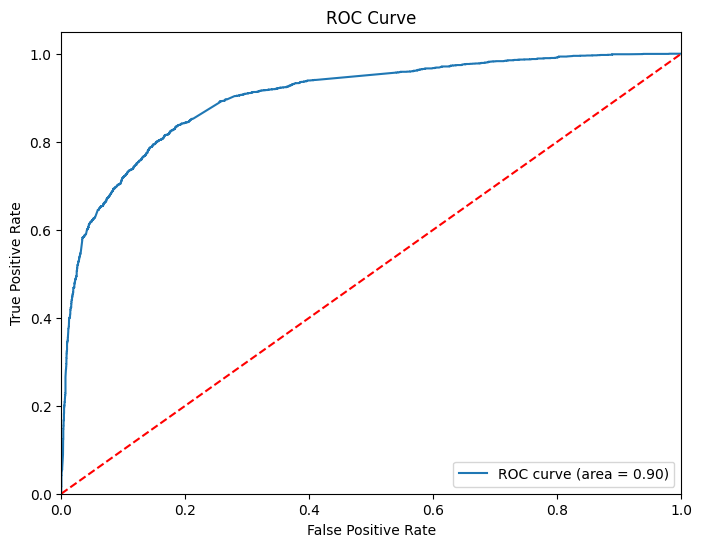

-------------------------------Residual Analysis-------------------------------


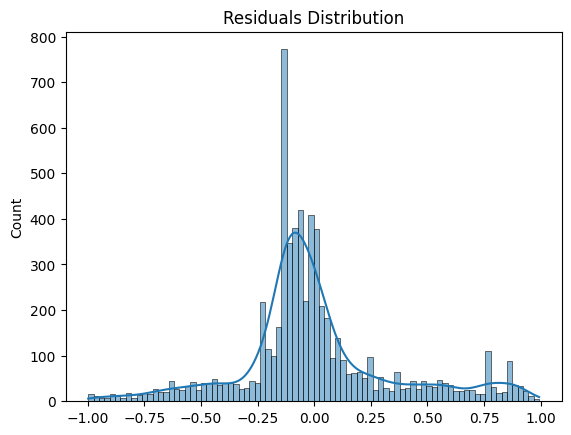

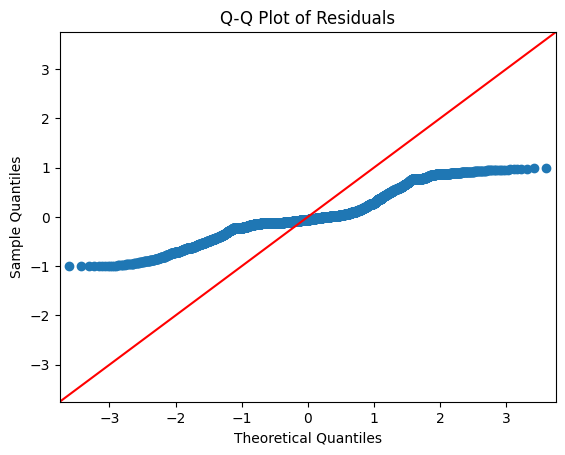

In [68]:
roc_curve_model(y_train, y_train_pred_prob)

<H4>Key Observations from the Residual Distribution:</H4>
#Model has a very good ability to differentiate between positive and negative cases.<Br>
#ROC curve's significant lift above the baseline indicates strong model performance. At lower FPR, the TPR is already high, meaning the model is good at identifying positives

<H4>Key Observations from the Residual Distribution:</H4>
#The residuals are mostly centered around 0, which is expected in a well-performing model. Residuals represent the differences between the actual values and the predicted probabilities.<Br>
#A concentration around 0 suggests that most of the predictions are reasonably accurate, with small errors.

<H4>Key Observations from the Q-Q Plot:</H4>
#The residuals fall close to the red diagonal line, especially in the center of the plot. This indicates that the residuals are approximately normally distributed in the middle range, which is a good sign for model performance<Br>
#The plot appears mostly symmetric around zero, which is a positive indicator that the model's errors are balanced between under-predictions and over-predictions.

### Making Prediction on the Train set

In [69]:
y_train.shape

(6468,)

In [70]:
def MakePrediction(X_data_sm,y_data, cutoff):
    y_data_pred = model.predict(X_data_sm)
    print("Sample prediction \n- {}".format(y_data_pred[:10]))
    print("-------------------------------------------------")

    #Creating data frame with actual converted and predicted probability
    y_data_pred_final = pd.DataFrame({'Converted':y_data.values, 'Converted_probability':y_data_pred})
    y_data_pred_final['Lead Number'] = y_data.index

    # Creating column 'predicted' with 1 if Converted_Prob > cutoff else 0
    y_data_pred_final['predicted'] = y_data_pred_final.Converted_probability.map(lambda x: 1 if x > cutoff else 0)
    print("Final Predicted data set \n: {}".format(y_data_pred_final.head()))

    y_data_pred_final['Lead_Score'] = y_data_pred_final.Converted_probability.map( lambda x: round(x*100))

    return y_data_pred_final

In [71]:
y_train_pred_final = MakePrediction(X_train_sm, y_train,0.5)

Sample prediction 
- 4715    0.125965
7132    0.916106
8954    0.154590
5283    0.248179
3003    0.377485
478     0.125965
1352    0.915579
3166    0.824938
7700    0.161658
2647    0.232419
dtype: float64
-------------------------------------------------
Final Predicted data set 
:       Converted  Converted_probability  Lead Number  predicted
4715          0               0.125965         4715          0
7132          1               0.916106         7132          1
8954          0               0.154590         8954          0
5283          0               0.248179         5283          0
3003          0               0.377485         3003          0


In [72]:
y_train_pred_final.head()

,Converted,Converted_probability,Lead Number,predicted,Lead_Score
4715,0,0.125965,4715,0,13
7132,1,0.916106,7132,1,92
8954,0,0.154590,8954,0,15
5283,0,0.248179,5283,0,25
3003,0,0.377485,3003,0,38


In [73]:
#Final Model Evaluation
model_predict(y_train_pred_final.Converted, y_train_pred_final.predicted)


Accuracy : 0.8303957946815089
--------------------
Precision : 0.8136589778380823
--------------------
Recall : 0.7242351046698873
--------------------
F1-Score : 0.7663471778487753
--------------------
Confusion Matrix - 
 : [[3572  412]
 [ 685 1799]]


-------------------------------ROC Curve-------------------------------


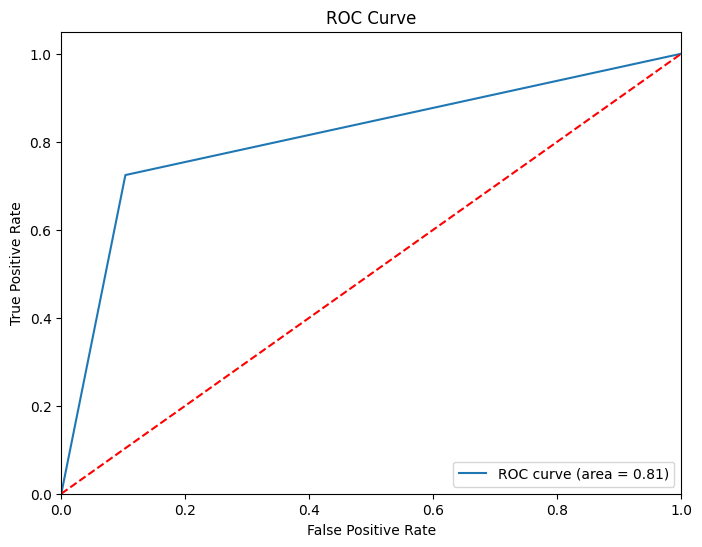

-------------------------------Residual Analysis-------------------------------


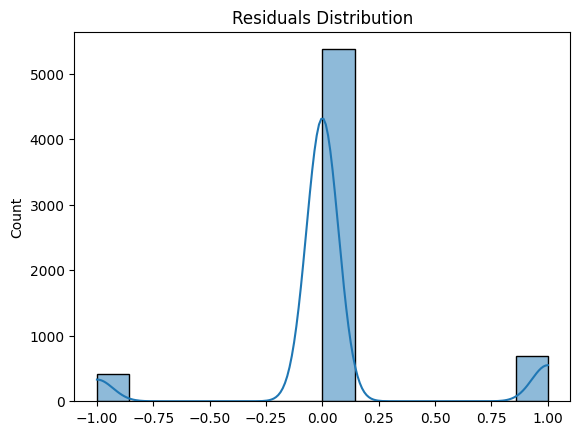

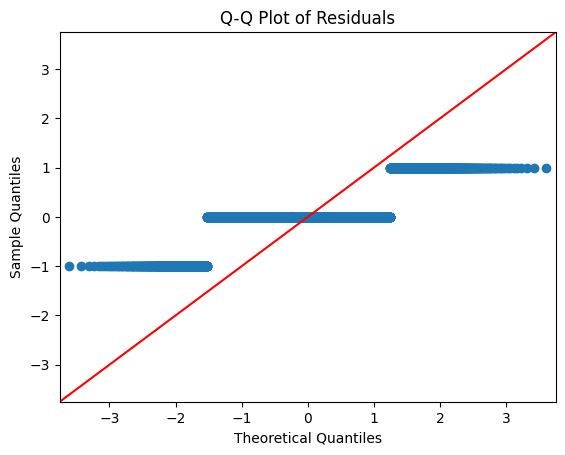

In [74]:
#Final Model ROC curve
roc_curve_model(y_train_pred_final.Converted, y_train_pred_final.predicted)

### Finding Optimal Cutoff Point

In [75]:
cutoff_points = [x/10 for x in range(10)]
for i in cutoff_points:
    y_train_pred_final[i] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_probability,Lead Number,predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4715,0,0.125965,4715,0,13,1,1,0,0,0,0,0,0,0,0
7132,1,0.916106,7132,1,92,1,1,1,1,1,1,1,1,1,1
8954,0,0.154590,8954,0,15,1,1,0,0,0,0,0,0,0,0
5283,0,0.248179,5283,0,25,1,1,1,0,0,0,0,0,0,0
3003,0,0.377485,3003,0,38,1,1,1,1,0,0,0,0,0,0


In [76]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in cutoff_points:
    conf_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(conf_matrix))

    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/total1
    specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]       
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.384045     1.000000     0.000000
0.1          0.1  0.602505     0.973027     0.371486
0.2          0.2  0.786642     0.904589     0.713102
0.3          0.3  0.822511     0.833736     0.815512
0.4          0.4  0.829159     0.791063     0.852912
0.5          0.5  0.830396     0.724235     0.896586
0.6          0.6  0.826840     0.663043     0.928966
0.7          0.7  0.820965     0.602657     0.957078
0.8          0.8  0.793754     0.502818     0.975151
0.9          0.9  0.751082     0.369968     0.988705


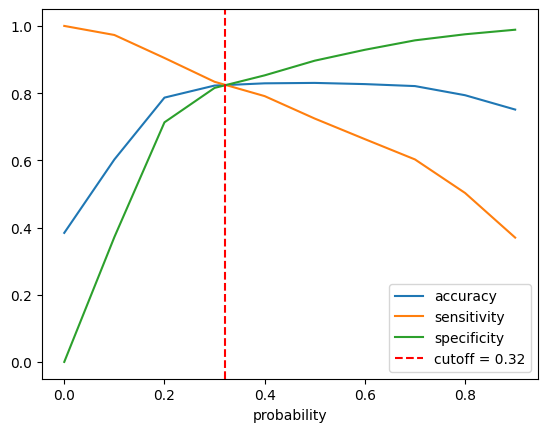

In [77]:
#Line plot showing the relationship between probability cutoff values and key performance metrics (accuracy, sensitivity, and specificity).
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.axvline(x = 0.32,color='r',linestyle='--')
plt.legend(['accuracy', 'sensitivity', 'specificity', 'cutoff = 0.32'], loc='best')
plt.show()

### Taking the optimal cut off point as .32

In [78]:
y_train_pred_final.rename(columns={'predicted':'Initial_Predicted'}, inplace=True)
y_train_pred_final['predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Lead Number,Initial_Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
4715,0,0.125965,4715,0,13,1,1,0,0,0,0,0,0,0,0,0
7132,1,0.916106,7132,1,92,1,1,1,1,1,1,1,1,1,1,1
8954,0,0.154590,8954,0,15,1,1,0,0,0,0,0,0,0,0,0
5283,0,0.248179,5283,0,25,1,1,1,0,0,0,0,0,0,0,0
3003,0,0.377485,3003,0,38,1,1,1,1,0,0,0,0,0,0,1


In [79]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_probability.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_probability,Lead Number,Initial_Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
4715,0,0.125965,4715,0,13,1,1,0,0,0,0,0,0,0,0,0
7132,1,0.916106,7132,1,92,1,1,1,1,1,1,1,1,1,1,1
8954,0,0.154590,8954,0,15,1,1,0,0,0,0,0,0,0,0,0
5283,0,0.248179,5283,0,25,1,1,1,0,0,0,0,0,0,0,0
3003,0,0.377485,3003,0,38,1,1,1,1,0,0,0,0,0,0,1


In [80]:
# Calculating metrics using Confusion matrix

def Conf_matrix(y_data_pred_final):
    confusion = metrics.confusion_matrix(y_data_pred_final.Converted, y_data_pred_final.predicted )

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives 
    FN = confusion[1,0] # false negatives
    accuracy5=("Accuracy :",)
    
    print("Accuracy : ", metrics.accuracy_score(y_data_pred_final.Converted, y_data_pred_final.predicted))
    print("Sensitivity : ", TP / float(TP+FN))
    print("Specificity :",TN / float(TN+FP))
    print("Precision : ", TP / float(TP + FP))
    print("Recall : ", TP / float(TP + FN))

In [81]:
#Final Metrics for train data set 
Conf_matrix(y_train_pred_final)

Accuracy :  0.8237476808905381
Sensitivity :  0.8256843800322061
Specificity : 0.8225401606425703
Precision :  0.7436548223350253
Recall :  0.8256843800322061


### Making predictions on Test Set

In [82]:
#scaling the test data
X_test  = scaler_transform(X_test, std_scaler_col,"No")

In [83]:
X_test = X_test[selected_features]

In [84]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Referral Sites,Specialization_Hospitality Management,What is your current occupation_Unknown,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst
4608,0,-0.428249,1,0,0,0,0,0,0,0,0,0,0,1,0
7935,1,0.805598,1,0,0,0,0,0,1,0,0,0,0,1,0
4043,1,-0.883879,1,0,0,0,0,0,0,0,0,0,0,1,0
7821,0,-0.298850,1,0,0,0,0,0,0,1,0,0,1,0,0
856,0,-0.521198,1,0,0,0,0,0,1,0,0,0,0,1,0


In [85]:
#Make Prediction on the test Data
# Adding a const
X_test_sm = sm.add_constant(X_test)
y_pred_final = MakePrediction(X_test_sm, y_test, 0.32) 

Sample prediction 
- 4608    0.138947
7935    0.095552
4043    0.037566
7821    0.427134
856     0.065247
927     0.214376
318     0.977002
1018    0.117736
8151    0.095215
1570    0.987289
dtype: float64
-------------------------------------------------
Final Predicted data set 
:       Converted  Converted_probability  Lead Number  predicted
4608          1               0.138947         4608          0
7935          0               0.095552         7935          0
4043          0               0.037566         4043          0
7821          0               0.427134         7821          1
856           0               0.065247          856          0


In [86]:
y_pred_final.tail()

,Converted,Converted_probability,Lead Number,predicted,Lead_Score
4184,0,0.210352,4184,0,21
5023,0,0.030951,5023,0,3
6661,0,0.019205,6661,0,2
2201,0,0.113579,2201,0,11
1160,0,0.089660,1160,0,9


In [87]:
Conf_matrix(y_pred_final)

Accuracy :  0.829004329004329
Sensitivity :  0.840297121634169
Specificity : 0.8218289085545722
Precision :  0.7497928748964374
Recall :  0.840297121634169


### Train and Test data Results

<H4>Train Data</H4>
<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>Accuracy</th>
      <th>Sensitivity</th>
      <th>Specificity</th>
      <th>Precision</th>
      <th>Recall</th>      
    </tr>
    <tr>
       <td>82.37%</td>
       <td>82.56</td>
       <td>82.25%</td>
       <td>74.36%</td>
       <td>82.56%</td>
    </tr>
  </thead>

<H4>Test Data</H4>
<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>Accuracy</th>
      <th>Sensitivity</th>
      <th>Specificity</th>
      <th>Precision</th>
      <th>Recall</th>      
    </tr>
    <tr>
       <td>82.90%</td>
       <td>84.02</td>
       <td>82.18%</td>
       <td>74.97%</td>
       <td>84.02%</td>
    </tr>
  </thead>

<H4>The model was able to predict the Lead conversion with more than 80% accuracy.<Br>Train and test data seems to be showing very less difference which shows the model stability.</H4> 

In [88]:
y_pred_final.loc[y_pred_final["Lead_Score"]>=80]

,Converted,Converted_probability,Lead Number,predicted,Lead_Score
318,1,0.977002,318,1,98
1570,1,0.987289,1570,1,99
8086,1,0.996364,8086,1,100
1840,1,0.876902,1840,1,88
6157,1,0.964775,6157,1,96
...,...,...,...,...,...
548,1,0.950440,548,1,95
7288,1,0.890980,7288,1,89
616,1,0.884772,616,1,88
622,1,0.890980,622,1,89


In [89]:
#Leads which has high conversion rate

leadconversion = y_pred_final.loc[y_pred_final["Lead_Score"]>=90]
leadconversion['Lead Number'].values.reshape(-1)

array([ 318, 1570, 8086, 6157, 8030, 2952, 1568, 4816, 3290, 1561, 5505,
       5688, 1957, 1446, 7840, 1965, 8687, 3721, 8068,   76, 8504, 6119,
       9107, 4157, 2574, 1318, 6712, 4123, 7719, 1730, 7636, 2273, 2067,
        623, 2142, 8282, 3033,   88, 1614, 3937, 2018, 3315, 6977, 1559,
       1263, 2882, 4313, 5314, 5559, 1978, 4252, 8816, 7993, 6666, 1803,
       1897, 2614, 5363,  267, 4002, 5395, 7448, 6126, 2473, 5720, 3739,
       2726, 3723, 6663, 8499, 2127, 1339, 4387, 3123, 2272, 3761, 3625,
       2673, 8946,  582,  212, 7653, 7082, 1406, 4734,  353, 7166, 2115,
        967, 5167, 6170, 4890, 8113, 8076, 6550, 2835, 5685, 2519, 1313,
       2680, 1488, 9068, 6134, 8749, 4772, 5817, 5206, 6754, 4230, 1071,
       3582, 4250, 6811, 5911, 5653, 1617, 4057, 3532, 2692, 8704, 4880,
       8052, 1758, 7127, 5621, 5159, 2812,  211,  789,   12,   37, 5266,
       2392,  676, 2543, 5804, 1737,  994, 7174, 1068, 4028, 7053, 1090,
       2145, 3299, 4241, 3064, 2114, 5858, 7470, 84

In [90]:
#Important Features from our final model
model.params.sort_values(ascending=False)


Lead Origin_Lead Add Form                               3.083239
const                                                   2.283911
What is your current occupation_Working Professional    1.525493
Total Time Spent on Website                             1.028789
Lead Source_Olark Chat                                  0.831544
Lead Origin_Landing Page Submission                    -0.270319
Lead Source_Referral Sites                             -0.706979
What is your current occupation_Unknown                -0.742412
Lead Source_Facebook                                   -0.942725
Do Not Email                                           -0.950541
Specialization_Hospitality Management                  -1.059615
Lead Quality_Low in Relevance                          -1.320248
Lead Quality_Might be                                  -1.627085
Lead Quality_Unknown                                   -3.397079
Lead Quality_Not Sure                                  -3.525185
Lead Quality_Worst       

### Conclusion:

1. Marketing team should focus more on "working professionals" as they are more likely to get converted.
2. Marketing team should focus more on leads who spent time on website as they are more likely to get converted.
3. Marketing team should focus more on leads coming from Olark Chat as they are more likely to get converted.
4. Marketing team should skip calls to the leads who chose the option "Do not Email" as "yes" as they are not likely to get converted.
5. Marketing team should skip calls to the leads who has the Lead Origin as "Landing Page Submission" as they are not likely to get converted.